<a href="https://colab.research.google.com/github/HagarIbrahiem/ML-Classification_Models/blob/main/MultiClassification_using_Binary_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml ('mnist_784', version=1)

In [48]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [49]:
X, y = mnist['data'],mnist['target']
import numpy as np
y.shape

(70000,)

In [50]:
y = y.astype(np.uint8)
y.shape

(70000,)

In [51]:
import numpy as np
digit= X.to_numpy()[1]

In [52]:
_digit = digit.reshape(28,28)

<function matplotlib.pyplot.show>

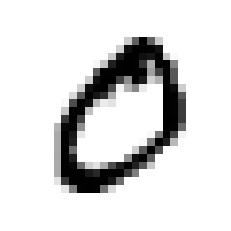

In [53]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.imshow(_digit , cmap=mpl.cm.binary )
plt.axis('off')
plt.show

In [54]:
X_train , X_test, y_train, y_test = X[:60000],X[60000:], y[:60000],y[60000:]

In [55]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)


In [56]:
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [57]:
digit = X.to_numpy()[5]

In [58]:
sgd_clf.predict([digit])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([2], dtype=uint8)

Scikit-Learn detects when you try to use a binary classification algorithm for a multiclass
classification task, and it automatically runs OvA (except for SVM classifiers for
which it uses OvO).

In [59]:
some_digit_score= sgd_clf.decision_function([digit])
some_digit_score

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([[-15541.82888672, -29286.65271153,   3512.16981303,
         -6832.08390768, -19312.77223333,  -9222.09311121,
        -33451.06615947, -21325.87368895,  -2296.78795949,
         -6958.23332214]])

In [60]:
np.argmax(some_digit_score)

2

In [61]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [62]:
sgd_clf.classes_[2]

2

If you want to force ScikitLearn to use one-versus-one or one-versus-all, you can use
the OneVsOneClassifier or OneVsRestClassifier classes. Simply create an instance
and pass a binary classifier to its constructor. For example, this code creates a multiclass
classifier using the OvO strategy, based on a SGDClassifier:

In [63]:
from sklearn.multiclass import OneVsOneClassifier
ovo_sgd = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_sgd.fit(X_train , y_train)


OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [64]:
ovo_sgd.predict([digit])


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but OneVsOneClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([2], dtype=uint8)

In [65]:
ovo_sgd.estimators_
len(ovo_sgd.estimators_)

45

This time Scikit-Learn did not have to run OvA or OvO because Random Forest
classifiers can directly classify instances into multiple classes.

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)
rf_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [67]:
rf_clf.predict([digit])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([2], dtype=uint8)

In [68]:
rf_clf.predict_proba([digit])


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([[0.01, 0.  , 0.88, 0.01, 0.  , 0.04, 0.01, 0.  , 0.03, 0.02]])

In [69]:
len(rf_clf.estimators_)

100

**Classifiers Evaluation**

In [70]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train,y_train, cv=3,scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [71]:
cross_val_score(ovo_sgd, X_train,y_train, cv=3,scoring='accuracy')


array([0.91545, 0.9131 , 0.92045])

In [104]:
cross_val_score(rf_clf, X_train,y_train, cv=3,scoring='accuracy')


array([0.9646 , 0.96255, 0.9666 ])

**Error Analysis**

Assume that you have found a promising model and you want
to find ways to improve it. One way to do this is to analyze the types of errors it
makes.

In [74]:
from sklearn.model_selection import cross_val_predict
y_train_predicted= cross_val_predict(sgd_clf, X_train,y_train , cv = 3 )

In [81]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train , y_train_predicted)
conf_mx

array([[5635,    0,   61,   10,   16,   50,   46,    7,   66,   32],
       [   3, 6393,   95,   21,   16,   47,   15,   27,  109,   16],
       [  72,   56, 5174,   89,   69,   39,  163,   66,  212,   18],
       [  58,   32,  217, 4941,   23,  441,   32,   56,  216,  115],
       [  11,   26,   46,    6, 5298,   26,   73,   32,   87,  237],
       [  68,   23,   58,  150,   83, 4606,  174,   26,  152,   81],
       [  40,   13,   56,    6,   22,  113, 5625,    5,   36,    2],
       [  23,   24,  103,   36,  124,   40,   10, 5228,   75,  602],
       [  40,  101,  158,  122,   49,  457,   77,   35, 4666,  146],
       [  33,   18,   66,   83,  515,  127,    4,  485,  166, 4452]])

It’s often more convenient to look at an image representation
of the confusion matrix, using Matplotlib’s matshow() function:

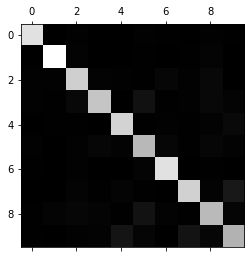

In [83]:
import matplotlib as mlp
import matplotlib.pyplot as plt

plt.matshow(conf_mx , cmap = plt.cm.gray)
plt.show()

This confusion matrix looks fairly good, since most images are on the main diagonal,
which means that they were classified correctly. The 5s look slightly darker than the
other digits, which could mean that there are fewer images of 5s in the dataset or that
the classifier does not perform as well on 5s as on other digits.

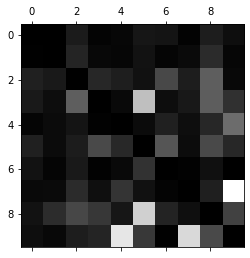

In [84]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
# Now let’s fill the diagonal with zeros to keep only the errors, and let’s plot the result:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()


Now you can clearly see the kinds of errors the classifier makes. Remember that rows
represent actual classes, while columns represent predicted classes. The column for
class 8 is quite bright, which tells you that many images get misclassified as 8s. However,
the row for class 8 is not that bad, telling you that actual 8s in general get properly
classified as 8s. (Percision Vs. Recall)
 As you can see, the confusion matrix is not necessarily
symmetrical. You can also see that 3s and 5s often get confused (in both directions).


Analyzing the confusion matrix can often give you insights on ways to improve your
classifier. Looking at this plot, it seems that your efforts should be spent on reducing
the false 8s. For example, you could try to gather more training data for digits that
look like 8s (but are not) so the classifier can learn to distinguish them from real 8s.
Or you could engineer new features that would help the classifier—for example, writing
an algorithm to count the number of closed loops (e.g., 8 has two, 6 has one, 5 has
none). Or you could preprocess the images (e.g., using Scikit-Image, Pillow, or
OpenCV) to make some patterns stand out more, such as closed loops.

**Analyzing individual errors**

Analyzing individual errors can also be a good way to gain insights on what your
classifier is doing and why it is failing, but it is more difficult and time-consuming.

In [99]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_predicted == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_predicted == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_predicted == cl_b)]
X_bb = X_train[(y_train == cl_b) & (y_train_predicted == cl_a)]

In [102]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [np.array(instances.iloc[i]).reshape(size, size) for i in range(instances.shape[0])] #change done here
    
    if images_per_row == 0:
       images_per_row = 0.1
    
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = plt.cm.binary, **options)
    plt.axis("off")

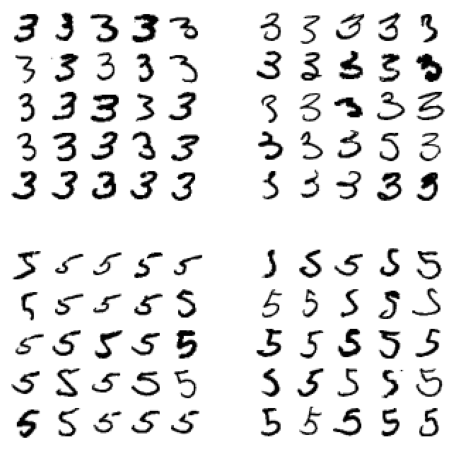

In [103]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

The two 5×5 blocks on the left show digits classified as 3s, and the two 5×5 blocks on
the right show images classified as 5s. Some of the digits that the classifier gets wrong
(i.e., in the bottom-left and top-right blocks) are so badly written that even a human
would have trouble classifying them

However, most misclassified images seem like obvious
errors to us, and it’s hard to understand why the classifier made the mistakes it did.3
The reason is that we used a simple SGDClassifier, which is a linear model. All it
does is assign a weight per class to each pixel, and when it sees a new image it just
sums up the weighted pixel intensities to get a score for each class. So since 3s and 5s
differ only by a few pixels, this model will easily confuse them.

The main difference between 3s and 5s is the position of the small line that joins the
top line to the bottom arc. If you draw a 3 with the junction slightly shifted to the left,
the classifier might classify it as a 5, and vice versa. In other words, this classifier is
quite sensitive to image shifting and rotation. So one way to reduce the 3/5 confusion
would be to preprocess the images to ensure that they are well centered and not too
rotated. This will probably help reduce other errors as well.